In [15]:
import cv2
import matplotlib.pyplot as plt
import dlib
from imutils import face_utils
font = cv2.FONT_HERSHEY_SIMPLEX

In [16]:
import numpy as np

In [17]:
from os import listdir
from os.path import isdir
from PIL import Image
from matplotlib import pyplot
from numpy import savez_compressed
from numpy import asarray

In [18]:
gray = cv2.imread(r'pic3.jpg', 1)
im = np.float32(gray) / 255.0
gx = cv2.Sobel(im, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(im, cv2.CV_32F, 0, 1, ksize=1)
mag, angle = cv2.cartToPolar(gx, gy, angleInDegrees=True)

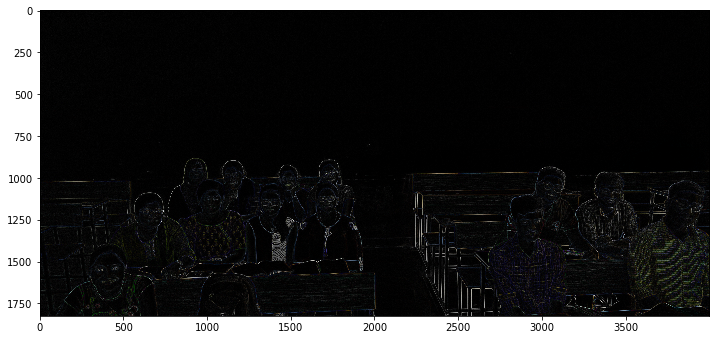

In [19]:
plt.figure(figsize=(12,8))
plt.imshow(mag)
plt.show()

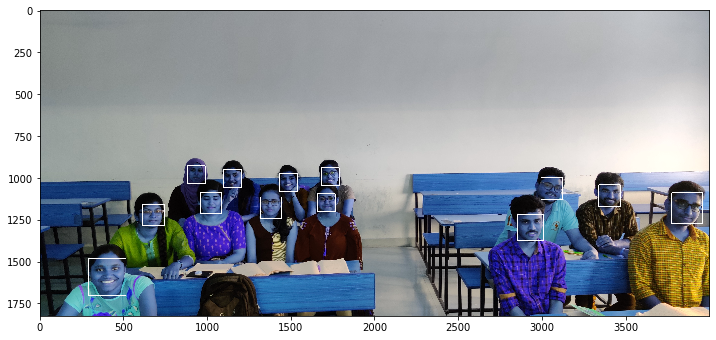

In [20]:
face_detect = dlib.get_frontal_face_detector()
rects = face_detect(gray, 1)
num=0
faces = list()
for (i, rect) in enumerate(rects):
    (x1, y1, w, h) = face_utils.rect_to_bb(rect)
    x1, y1 = abs(x1), abs(y1)
    cv2.rectangle(gray, (x1, y1), (x1 + w, y1 + h), (255, 255, 255), 3)
    x2, y2 = x1 + w, y1 + h
    roi_color = gray[y1:y2,x1:x2]
    num+=1
plt.figure(figsize=(12,8))
plt.imshow(gray, cmap='gray')
plt.show()

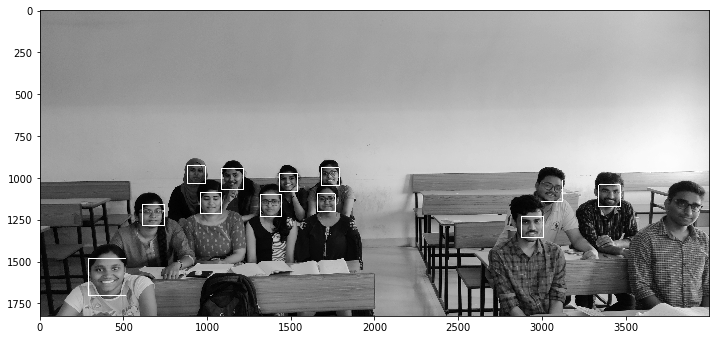

In [30]:
face_detect = dlib.get_frontal_face_detector()
rects = face_detect(gray, 1)
pixels = asarray(gray)
num=0
required_size=(160, 160)
faces = list()
for (i, rect) in enumerate(rects):
    (x1, y1, w, h) = face_utils.rect_to_bb(rect)
    x1, y1 = abs(x1), abs(y1)
    cv2.rectangle(gray, (x1, y1), (x1 + w, y1 + h), (255, 255, 255), 3)
    x2, y2 = x1 + w, y1 + h
    face = pixels[y1:y2,x1:x2]
    image = Image.fromarray(face)
    image = image.resize(required_size)
    image = image.convert('RGB')
    face = asarray(image)
    faces.append(face)
    roi_color = gray[y1:y1+h,x1:x1+w]
    cv2.imwrite('C:/Users/Akhil/dest/pic'+str(num)+'.jpg', roi_color)
    num+=1
plt.figure(figsize=(12,8))
plt.imshow(gray, cmap='gray')
plt.show()
facearray = asarray(faces)
np.savez_compressed('class-group.npz', facearray)